In [1]:
#Importing python libraries from local files. 
import sys
sys.path.append('..')
from utils.CameraUtils import *
import utils.DuckbotExptSetupUtils as exp
from utils.MachineUtils import *
import utils.PlatePositionUtils as pp 
import cv2
import numpy as np
import os

from plantcv import plantcv as pcv


In [4]:
port = "/dev/ttyACM0"
m = MachineCommunication(port)

m.moveTo(z=50)

In [4]:
# grab the camera tool
m.toolChange(1)

In [5]:
# move to a well with a frond
well = pp.fetch_well_position(1, 'C1')

m.moveTo(x=well['x'], y=well['y'])

In [15]:
m.moveTo(z=80)

In [16]:
#Open a live video window
cap = cv2.VideoCapture(0) #Note that the index corresponding to your camera may not be zero but this is the most common default

while True:
    ret, frame = cap.read()
    cv2.imshow('Input', frame)
    c = cv2.waitKey(1)
    if c ==27: #27 is the built in code for ESC so press escape to close the window. 
        break 
        
cap.release()

cv2.destroyAllWindows()

In [7]:
f = getFrame()

In [8]:
%matplotlib inline
showFrame(f)
saveFrame(f, "/home/pi/Downloads/test-empty.jpg")

In [9]:
rgb = cv2.imread('/home/pi/Downloads/test-well.jpg')

In [2]:
#Looks for the outline of the well that the duckweed are in and crops to that outline. 
def circle_crop(file):
    img1 = cv2.imread(file)
    img = cv2.imread(file,0)
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    ret, thresh = cv2.threshold(gray, 100, 150, cv2.THRESH_BINARY)
    # Create mask
    height,width = img.shape
    mask = np.zeros((height,width), np.uint8)
    cimg=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    edges = cv2.Canny(gray, 25, 100)
    gain = 1
    for g in np.arange(gain, 10, 0.1):
        # find the right gain to find a single circle
        circles = cv2.HoughCircles(edges,
                                   cv2.HOUGH_GRADIENT,
                                   g,
                                   minDist=100,
                                   param1=100,
                                   param2=100,
                                   minRadius=325,
                                   maxRadius=650
                                   )
        if circles is None:
            continue
        numCircles = circles[0,:].shape[0]
        if numCircles == 1:
            print(f"I used a gain of {g}")
            break

#     circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 100, param1 = 100, param2 = 30, minRadius = 325, maxRadius = 650)
    if circles is not None:
        i = circles[0][0]                
        # Draw on mask
        center = (int(i[0]),int(i[1]))
        radius = int(i[2])
        cv2.circle(mask,center,radius,(255,255,255),thickness=-1)
# Copy that image using that mask
        masked_data = cv2.bitwise_and(img1, img1, mask=mask)
        # Apply Threshold
        _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
        # Find Contour
        contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        x,y,w,h = cv2.boundingRect(contours[0][0])
    #   Crop masked_data
        cropped_img = masked_data[y:y+h,x:x+w]
    else:
        cropped_img = "Error"
    return(np.ascontiguousarray(cropped_img))

def identify_fronds(img):
    s = pcv.rgb2gray_hsv(img, 's')
    s_thresh = pcv.threshold.binary(s, 120, 255, 'light')
    objects, hierarchy = cv2.findContours(s_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2:]
    # Cast tuple objects as a list
    objects = list(objects)
    count = 0
    for i, cnt in enumerate(objects):
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        # if area > 1000 and area < 2000: # and perimeter > 100:
        if perimeter > 100 and area > 500: # can add stricter filters here as necessary
            print(f"perimeter: {perimeter}\n area: {area}")
            count += 1
            M = cv2.moments(cnt)
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv2.circle(crop, (cx, cy), 10, (255,0,0), -1)
            cv2.drawContours(crop, objects, i, (255, 102, 255), 2, lineType=8, hierarchy=hierarchy)
    print(count)
    plt.imshow(crop)
    plt.show()

In [101]:
path =  '/home/pi/Downloads/test-empty.jpg'
crop = circle_crop(path)
plt.imshow(crop)

Expt_082222_Plate_1_wellA3_2022-08-22.jpg
ERROR! Session/line number was not unique in database. History logging moved to new session 685
I used a gain of 1.6000000000000005
perimeter: 847.0508583784103
 area: 47474.5
1


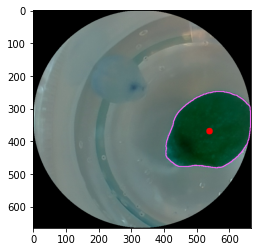

Expt_082222_Plate_3_wellB6_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 1386.437722325325
 area: 65059.5
1


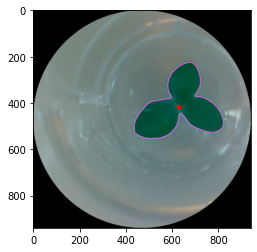

Expt_082222_Plate_1_wellD3_2022-08-22.jpg
I used a gain of 2.300000000000001
perimeter: 2200.64290869236
 area: 58661.5
1


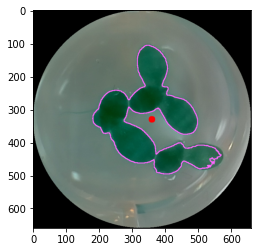

Expt_082222_Plate_1_wellC2_2022-08-22.jpg
perimeter: 700.4823168516159
 area: 20613.5
1


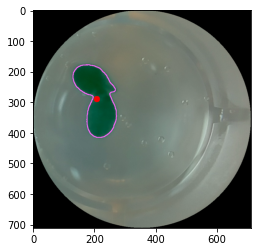

Expt_082222_Plate_2_wellA4_2022-08-22.jpg
I used a gain of 1.4000000000000004
perimeter: 1815.2976748943329
 area: 105241.0
1


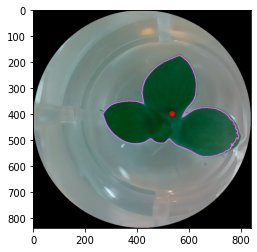

Expt_082222_Plate_3_wellA1_2022-08-22.jpg
I used a gain of 6.100000000000005
perimeter: 819.7960251569748
 area: 26913.5
1


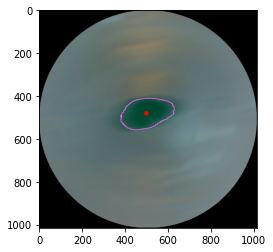

Expt_082222_Plate_2_wellB2_2022-08-22.jpg
I used a gain of 1.8000000000000007
perimeter: 801.7371500730515
 area: 25513.5
perimeter: 766.180801153183
 area: 25601.0
2


Expt_082222_Plate_1_wellC1_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 1375.52603495121
 area: 81594.5
1


Expt_082222_Plate_2_wellB4_2022-08-22.jpg
perimeter: 415.53910398483276
 area: 3965.0
perimeter: 622.8427076339722
 area: 19983.0
2


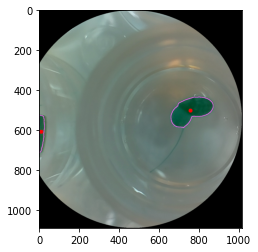

Expt_082222_Plate_1_wellD2_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 963.7615352869034
 area: 41574.5
1


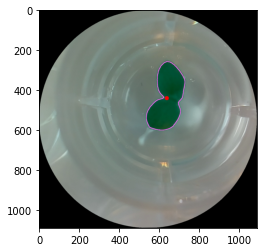

Expt_082222_Plate_1_wellB3_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 477.8305150270462
 area: 12681.5
1


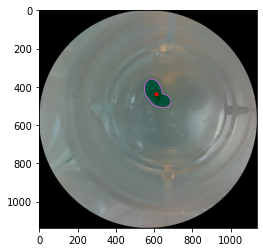

Expt_082222_Plate_1_wellD1_2022-08-22.jpg
perimeter: 1082.1463112831116
 area: 40900.0
1


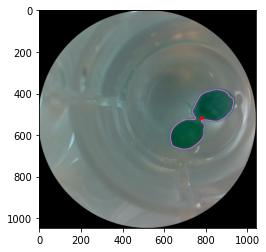

Expt_082222_Plate_1_wellD5_2022-08-22.jpg
perimeter: 274.2497808933258
 area: 4635.0
perimeter: 751.269113779068
 area: 22838.0
perimeter: 395.3036036491394
 area: 7603.0
3


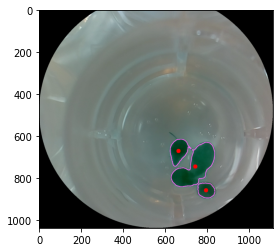

Expt_082222_Plate_3_wellB2_2022-08-22.jpg
I used a gain of 2.300000000000001
perimeter: 998.5483322143555
 area: 28630.0
1


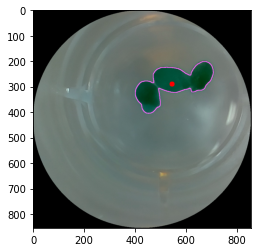

Expt_082222_Plate_2_wellA5_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 429.0609630346298
 area: 11227.5
1


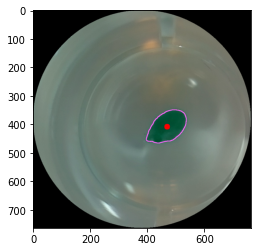

Expt_082222_Plate_1_wellC6_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 614.7838325500488
 area: 16016.0
1


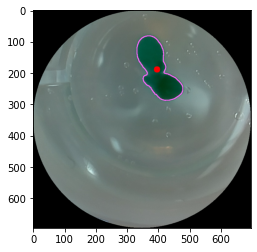

Expt_082222_Plate_1_wellD4_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 354.534051656723
 area: 7584.0
perimeter: 1603.6925555467606
 area: 45632.5
2


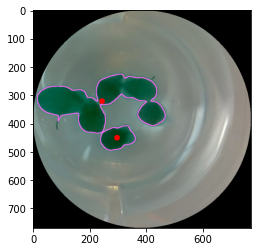

Expt_082222_Plate_2_wellB6_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 665.4112491607666
 area: 26401.0
1


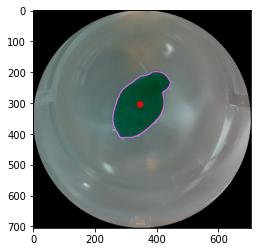

Expt_082222_Plate_1_wellC5_2022-08-22.jpg
I used a gain of 2.4000000000000012
perimeter: 310.8771975040436
 area: 6058.0
perimeter: 374.0904005765915
 area: 7963.5
perimeter: 1535.9768263101578
 area: 44404.5
3


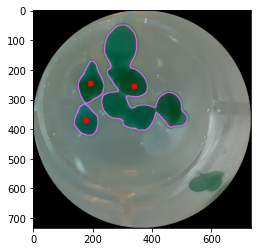

Expt_082222_Plate_1_wellA4_2022-08-22.jpg
I used a gain of 1.6000000000000005
perimeter: 348.2497808933258
 area: 7671.0
1


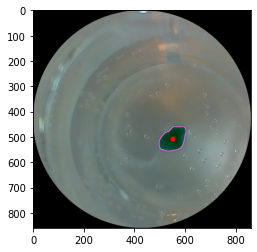

Expt_082222_Plate_2_wellD4_2022-08-22.jpg
I used a gain of 1.9000000000000008
perimeter: 797.8792854547501
 area: 24780.5
1


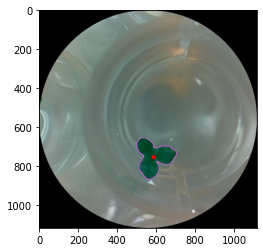

Expt_082222_Plate_3_wellB5_2022-08-22.jpg
I used a gain of 3.100000000000002
perimeter: 759.0092282295227
 area: 38308.0
perimeter: 719.9554054737091
 area: 34286.0
2


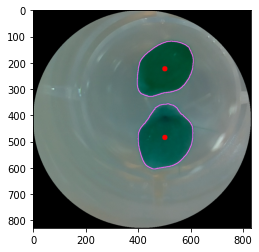

Expt_082222_Plate_3_wellA4_2022-08-22.jpg
I used a gain of 2.200000000000001
perimeter: 628.156415939331
 area: 16584.0
1


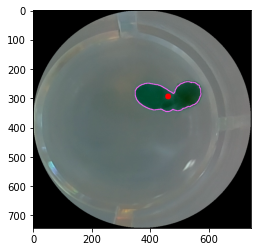

Expt_082222_Plate_2_wellC5_2022-08-22.jpg
perimeter: 588.7005722522736
 area: 16145.0
1


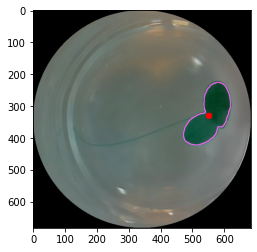

Expt_082222_Plate_2_wellB5_2022-08-22.jpg
I used a gain of 2.300000000000001
perimeter: 513.8721451759338
 area: 11829.0
1


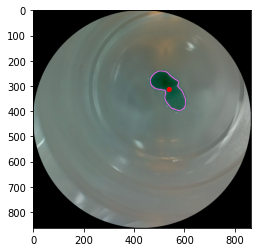

Expt_082222_Plate_3_wellA6_2022-08-22.jpg
perimeter: 430.0904005765915
 area: 10711.5
1


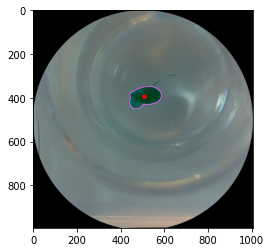

Expt_082222_Plate_3_wellA2_2022-08-22.jpg
I used a gain of 2.200000000000001
perimeter: 522.6000670194626
 area: 14438.5
1


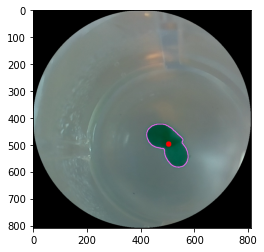

Expt_082222_Plate_1_wellC3_2022-08-22.jpg
perimeter: 809.2346239089966
 area: 43756.0
1


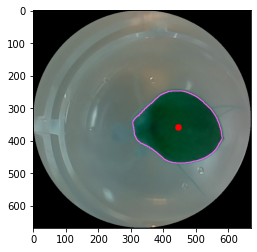

Expt_082222_Plate_3_wellB3_2022-08-22.jpg
I used a gain of 2.4000000000000012
perimeter: 587.8721451759338
 area: 17685.0
1


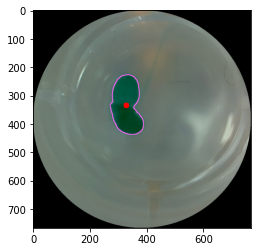

Expt_082222_Plate_1_wellA2_2022-08-22.jpg
perimeter: 632.156415939331
 area: 17917.0
perimeter: 1257.8691807985306
 area: 39509.5
perimeter: 1044.8326029777527
 area: 26420.0
3


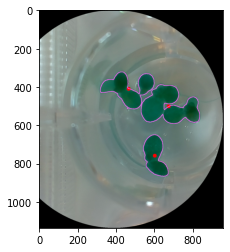

Expt_082222_Plate_3_wellB4_2022-08-22.jpg
I used a gain of 2.5000000000000013
perimeter: 305.0782079696655
 area: 4235.0
perimeter: 1745.2560447454453
 area: 50587.5
2


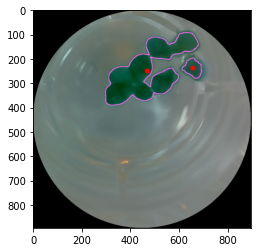

Expt_082222_Plate_2_wellD1_2022-08-22.jpg
I used a gain of 1.6000000000000005
perimeter: 962.3056915998459
 area: 23156.5
perimeter: 916.4478269815445
 area: 24639.5
2


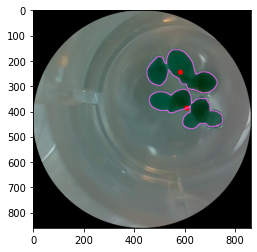

Expt_082222_Plate_2_wellD6_2022-08-22.jpg
I used a gain of 1.6000000000000005
perimeter: 1163.2590091228485
 area: 33768.0
1


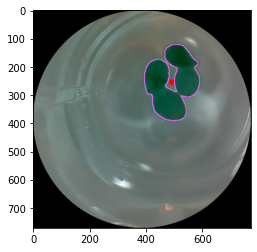

Expt_082222_Plate_1_wellC4_2022-08-22.jpg
perimeter: 1189.727045416832
 area: 59909.5
1


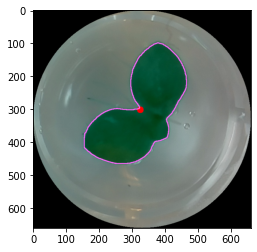

Expt_082222_Plate_3_wellA5_2022-08-22.jpg
perimeter: 476.71781718730927
 area: 13230.5
1


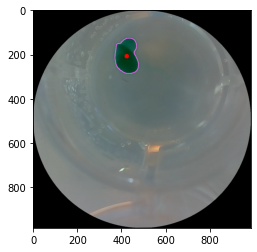

Expt_082222_Plate_1_wellB1_2022-08-22.jpg
I used a gain of 2.000000000000001
perimeter: 1595.5331752300262
 area: 111738.0
1


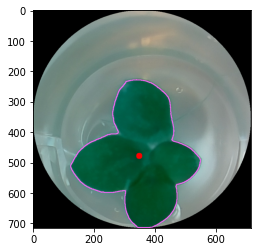

Expt_082222_Plate_1_wellA6_2022-08-22.jpg
perimeter: 628.9848430156708
 area: 18700.0
1


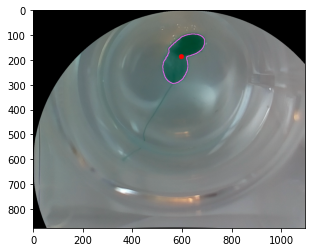

Expt_082222_Plate_3_wellB1_2022-08-22.jpg
I used a gain of 3.200000000000002
perimeter: 686.8843377828598
 area: 28056.5
1


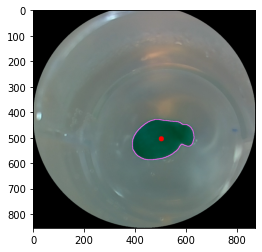

Expt_082222_Plate_1_wellB5_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 401.3036036491394
 area: 9953.0
1


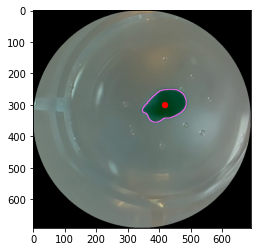

Expt_082222_Plate_2_wellA6_2022-08-22.jpg
I used a gain of 2.200000000000001
perimeter: 494.6173119544983
 area: 16702.0
1


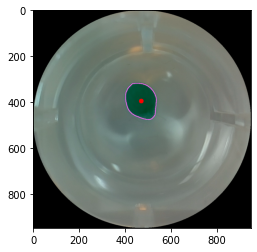

Expt_082222_Plate_2_wellA1_2022-08-22.jpg
perimeter: 634.9848430156708
 area: 17593.0
perimeter: 398.9188276529312
 area: 7882.5
perimeter: 567.3868639469147
 area: 15958.0
3


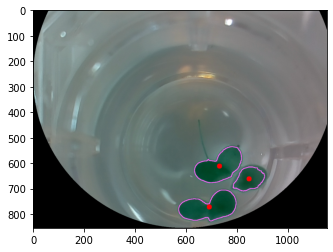

Expt_082222_Plate_2_wellC3_2022-08-22.jpg
I used a gain of 2.200000000000001
perimeter: 1150.8569881916046
 area: 32987.0
perimeter: 329.62236428260803
 area: 7000.0
2


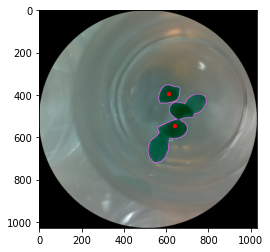

Expt_082222_Plate_1_wellA5_2022-08-22.jpg
I used a gain of 1.6000000000000005
perimeter: 312.59292674064636
 area: 5170.0
perimeter: 1078.6732226610184
 area: 54074.5
2


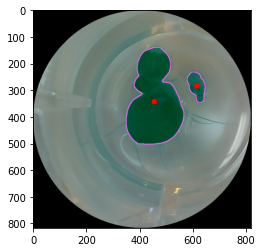

Expt_082222_Plate_2_wellB1_2022-08-22.jpg
perimeter: 125.49747383594513
 area: 891.5
perimeter: 134.18376553058624
 area: 715.5
perimeter: 172.36753106117249
 area: 653.0
3


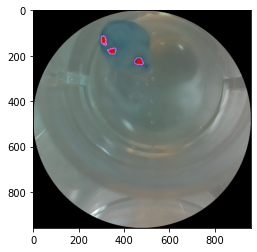

Expt_082222_Plate_2_wellC4_2022-08-22.jpg
perimeter: 1689.3981801271439
 area: 94127.5
1


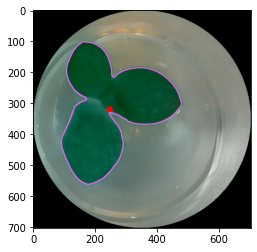

Expt_082222_Plate_1_wellD6_2022-08-22.jpg
perimeter: 782.9087229967117
 area: 26221.5
1


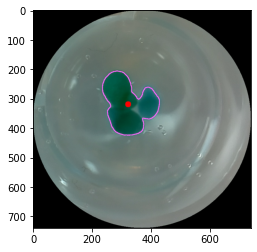

Expt_082222_Plate_1_wellB2_2022-08-22.jpg
I used a gain of 2.000000000000001
perimeter: 643.4701242446899
 area: 19827.0
1


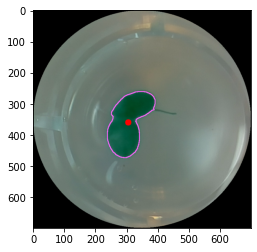

Expt_082222_Plate_1_wellB4_2022-08-22.jpg
I used a gain of 2.300000000000001
perimeter: 691.369619011879
 area: 18333.5
1


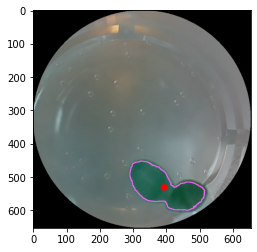

Expt_082222_Plate_2_wellD5_2022-08-22.jpg
I used a gain of 2.000000000000001
perimeter: 1909.2804299592972
 area: 118180.5
1


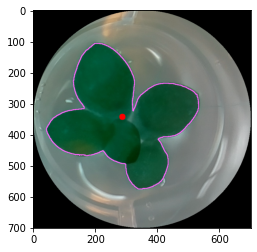

Expt_082222_Plate_2_wellB3_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 428.03152549266815
 area: 8643.5
perimeter: 1077.3595143556595
 area: 27590.5
2


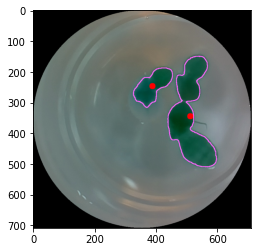

Expt_082222_Plate_2_wellC2_2022-08-22.jpg
perimeter: 1366.5798577070236
 area: 63096.5
1


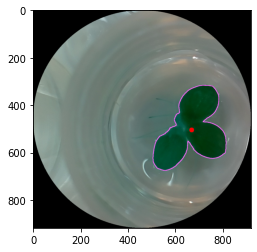

Expt_082222_Plate_2_wellC6_2022-08-22.jpg
I used a gain of 2.100000000000001
perimeter: 737.3107439279556
 area: 21050.5
1


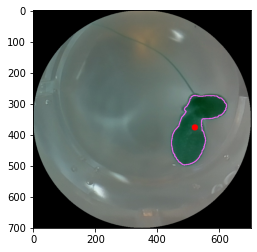

Expt_082222_Plate_2_wellD3_2022-08-22.jpg
I used a gain of 1.6000000000000005
perimeter: 415.3036036491394
 area: 10490.0
1


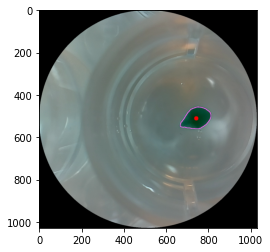

Expt_082222_Plate_1_wellA1_2022-08-22.jpg
perimeter: 588.8843377828598
 area: 12860.5
1


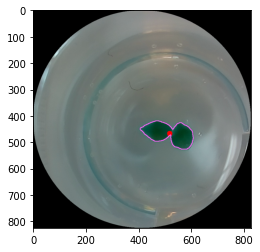

Expt_082222_Plate_2_wellA3_2022-08-22.jpg
I used a gain of 2.300000000000001
perimeter: 784.1391710042953
 area: 40041.5
1


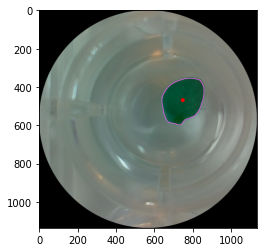

Expt_082222_Plate_2_wellD2_2022-08-22.jpg
I used a gain of 1.9000000000000008
perimeter: 2954.314043402672
 area: 147118.5
1


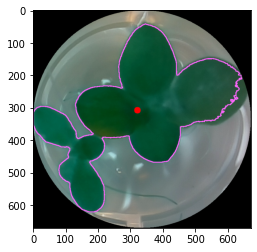

Expt_082222_Plate_2_wellC1_2022-08-22.jpg
I used a gain of 2.200000000000001
perimeter: 546.357426404953
 area: 16832.0
1


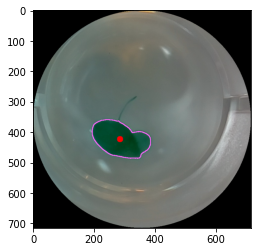

Expt_082222_Plate_3_wellA3_2022-08-22.jpg
I used a gain of 2.200000000000001
perimeter: 602.7422024011612
 area: 23988.5
1


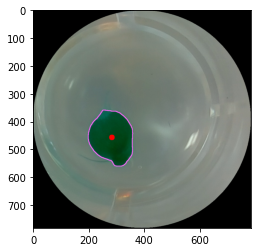

Expt_082222_Plate_2_wellA2_2022-08-22.jpg
perimeter: 277.8650048971176
 area: 5026.5
perimeter: 467.6883796453476
 area: 11301.5
2


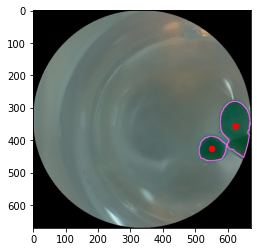

Expt_082222_Plate_1_wellB6_2022-08-22.jpg
perimeter: 424.27416610717773
 area: 10752.0
1


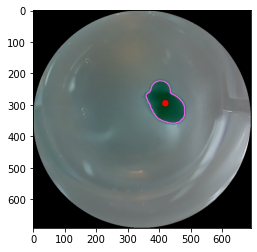

In [3]:
# read in all the previously taken images and report how many fronds there are
%matplotlib inline
image_dir = "/home/pi/Documents/Data/Expt_082222_CameraFixed/"

for image in os.listdir(image_dir):
    print(image)
    plt.show()
    img = cv2.imread(image_dir + image)
    crop = circle_crop(image_dir + image)
    identify_fronds(crop)
#     try:
#         identify_fronds(crop)
#     except:
#         print('error')
    
    

I used a gain of 2.200000000000001


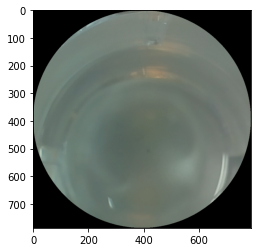

0


In [14]:
# rgb = cv2.imread('/home/pi/Documents/Downloads/test-empty.jpg')
crop = circle_crop('/home/pi/Downloads/test-empty.jpg')
s = pcv.rgb2gray_hsv(crop, 's')
s_thresh = pcv.threshold.binary(s, 120, 255, 'light')


objects, hierarchy = cv2.findContours(s_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2:]
# Cast tuple objects as a list
objects = list(objects)
count = 0
for i, cnt in enumerate(objects):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    # if area > 1000 and area < 2000: # and perimeter > 100:
    if perimeter > 0 and area > 0: # can add stricter filters here as necessary
        count += 1
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.circle(crop, (cx, cy), 10, (255,0,0), -1)
        cv2.drawContours(crop, objects, i, (255, 102, 255), 2, lineType=8, hierarchy=hierarchy)

    
        M = cv2.moments(cnt)
 
plt.imshow(crop)
plt.show()
print(count)
